In [3]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,10)

In [4]:
data=pd.read_csv('/Users/shivamsourav/Desktop/Ben.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
data.shape

(13320, 9)

In [6]:
data.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
new=data.drop(['area_type','society','balcony','availability'],axis='columns')
new.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
new.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
n=new.dropna()
n.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
n.shape

(13246, 5)

In [11]:
n['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
n['bhk']=n['size'].apply(lambda x: int(x.split(' ')[0]))

/var/folders/0n/xc9648gx0gsbnhr2j2xllfr00000gn/T/ipykernel_21213/3331325975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n['bhk']=n['size'].apply(lambda x: int(x.split(' ')[0]))


In [13]:
n.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
n['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [15]:
n[n.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [16]:
n.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
n[~n['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [19]:
def convert(x):
    arr = x.split('-')
    if len(arr) == 2:
        return (float(arr[0])+float(arr[1]))/2
    try:
        return float(x)
    except:
        return None
    

In [20]:
df=n.copy()
df.total_sqft=df.total_sqft.apply(convert)
df.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath              1.0
price            18.5
bhk                 1
Name: 410, dtype: object

# FEATURE ENGINEERING

In [21]:
d=df.copy()
d['price_per_sqft']=d['price']*100000/d['total_sqft']
d.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [22]:
len(d.location.unique())

1304

In [23]:
d.location=d.location.apply(lambda x: x.strip())
location_stats=d.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [24]:
len(location_stats[location_stats<=10])

1052

In [25]:
location_less_than_10=location_stats[location_stats<=10]
location_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [26]:
d.location=d.location.apply(lambda x: 'other' if x in location_less_than_10 else x)
len(d.location.unique())

242

In [27]:
d.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [28]:
d[d.total_sqft/d.bhk < 300].head(3)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810


In [29]:
d.shape

(13246, 7)

In [30]:
df6=d[~(d.total_sqft/d.bhk < 300)]
df6.shape

(12502, 7)

In [31]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [32]:
def remove(df):
    df_out=pd.DataFrame()
    for key , subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [33]:
df7=remove(df6)
df7.shape

(10241, 7)

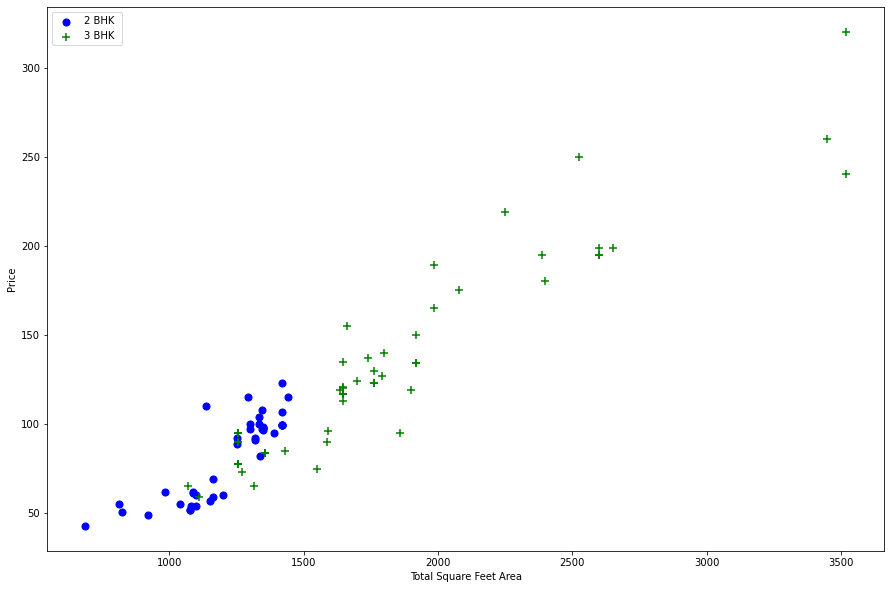

In [34]:
def plot(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2 )]
    bhk3=df[(df.location==location) & (df.bhk==3 )]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK ',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK ',s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.legend()

plot(df7,'Hebbal')

In [35]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7329, 7)

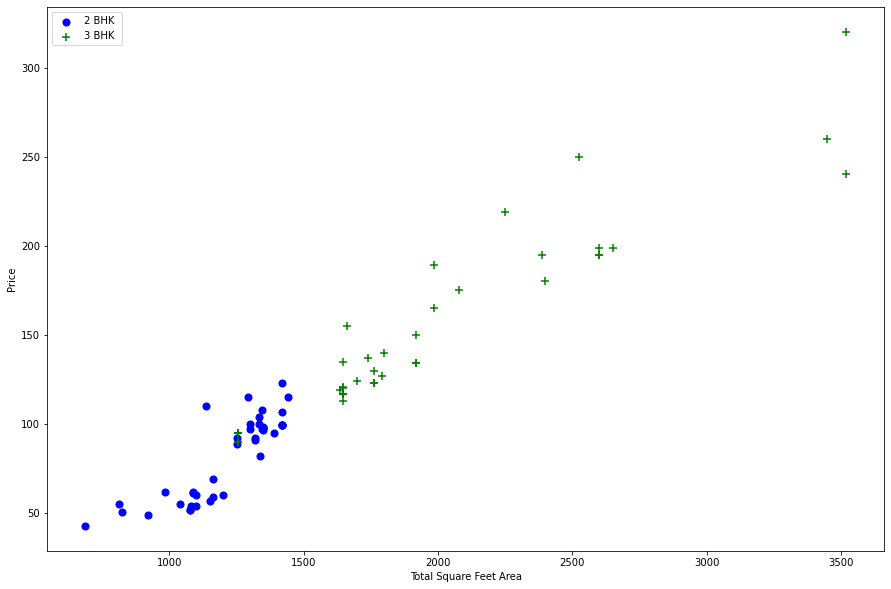

In [36]:
plot(df8,'Hebbal')

Text(0, 0.5, 'Count')

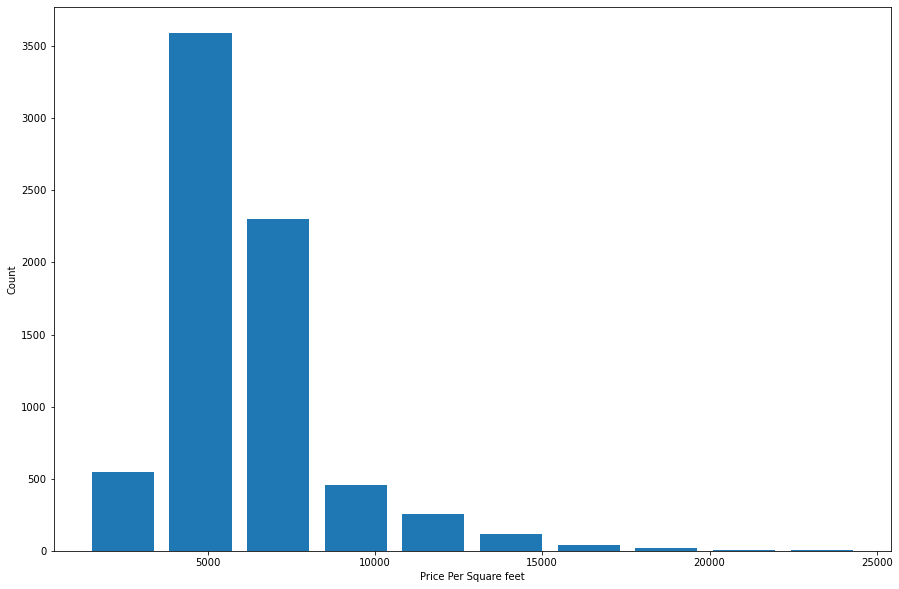

In [37]:
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel('Price Per Square feet')
plt.ylabel('Count')

In [38]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [39]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

In [40]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)


,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [41]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
X=df12.drop('price',axis='columns')
X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
y=df12.price
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10232     70.0
10233    200.0
10236    110.0
10237     26.0
10240    400.0
Name: price, Length: 7251, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
lin_reg.score(X_test,y_test)

def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lin_reg.predict([x])[0]*100000

In [50]:
print('Price is = Rs.',int(predict_price('1st Block Jayanagar',1000, 2, 2)))
from num2words import num2words
print(num2words(int(predict_price('1st Block Jayanagar',1000, 2, 2)),lang='en_IN'))

Price is = Rs. 20199197
two crore, one lakh, ninety-nine thousand, one hundred and ninety-seven


/Users/shivamsourav/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/shivamsourav/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [48]:
print('Price is = Rs',int(predict_price('1st Phase JP Nagar',1000, 2, 2)))

Price is = Rs 8349904


/Users/shivamsourav/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [49]:
print('Price is = Rs.',int(predict_price('Yeshwanthpur',1000, 3, 3)))

Price is = Rs. 7259735


/Users/shivamsourav/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [59]:
from tkinter import *
options=['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli',
       'Bommanahalli', 'Bommasandra', 'Bommasandra Industrial Area',
       'Bommenahalli', 'Brookefield', 'Budigere', 'CV Raman Nagar',
       'Chamrajpet', 'Chandapura', 'Channasandra', 'Chikka Tirupathi',
       'Chikkabanavar', 'Chikkalasandra', 'Choodasandra', 'Cooke Town',
       'Cox Town', 'Cunningham Road', 'Dasanapura', 'Dasarahalli',
       'Devanahalli', 'Devarachikkanahalli', 'Dodda Nekkundi',
       'Doddaballapur', 'Doddakallasandra', 'Doddathoguru', 'Domlur',
       'Dommasandra', 'EPIP Zone', 'Electronic City',
       'Electronic City Phase II', 'Electronics City Phase 1',
       'Frazer Town', 'GM Palaya', 'Garudachar Palya', 'Giri Nagar',
       'Gollarapalya Hosahalli', 'Gottigere', 'Green Glen Layout',
       'Gubbalala', 'Gunjur', 'HAL 2nd Stage', 'HBR Layout',
       'HRBR Layout', 'HSR Layout', 'Haralur Road', 'Harlur', 'Hebbal',
       'Hebbal Kempapura', 'Hegde Nagar', 'Hennur', 'Hennur Road',
       'Hoodi', 'Horamavu Agara', 'Horamavu Banaswadi', 'Hormavu',
       'Hosa Road', 'Hosakerehalli', 'Hoskote', 'Hosur Road', 'Hulimavu',
       'ISRO Layout', 'ITPL', 'Iblur Village', 'Indira Nagar', 'JP Nagar',
       'Jakkur', 'Jalahalli', 'Jalahalli East', 'Jigani',
       'Judicial Layout', 'KR Puram', 'Kadubeesanahalli', 'Kadugodi',
       'Kaggadasapura', 'Kaggalipura', 'Kaikondrahalli',
       'Kalena Agrahara', 'Kalyan nagar', 'Kambipura', 'Kammanahalli',
       'Kammasandra', 'Kanakapura', 'Kanakpura Road', 'Kannamangala',
       'Karuna Nagar', 'Kasavanhalli', 'Kasturi Nagar', 'Kathriguppe',
       'Kaval Byrasandra', 'Kenchenahalli', 'Kengeri',
       'Kengeri Satellite Town', 'Kereguddadahalli', 'Kodichikkanahalli',
       'Kodigehaali', 'Kodigehalli', 'Kodihalli', 'Kogilu', 'Konanakunte',
       'Koramangala', 'Kothannur', 'Kothanur', 'Kudlu', 'Kudlu Gate',
       'Kumaraswami Layout', 'Kundalahalli', 'LB Shastri Nagar',
       'Laggere', 'Lakshminarayana Pura', 'Lingadheeranahalli',
       'Magadi Road', 'Mahadevpura', 'Mahalakshmi Layout', 'Mallasandra',
       'Malleshpalya', 'Malleshwaram', 'Marathahalli', 'Margondanahalli',
       'Marsur', 'Mico Layout', 'Munnekollal', 'Murugeshpalya',
       'Mysore Road', 'NGR Layout', 'NRI Layout', 'Nagarbhavi',
       'Nagasandra', 'Nagavara', 'Nagavarapalya', 'Narayanapura',
       'Neeladri Nagar', 'Nehru Nagar', 'OMBR Layout', 'Old Airport Road',
       'Old Madras Road', 'Padmanabhanagar', 'Pai Layout', 'Panathur',
       'Parappana Agrahara', 'Pattandur Agrahara', 'Poorna Pragna Layout',
       'Prithvi Layout', 'R.T. Nagar', 'Rachenahalli',
       'Raja Rajeshwari Nagar', 'Rajaji Nagar', 'Rajiv Nagar',
       'Ramagondanahalli', 'Ramamurthy Nagar', 'Rayasandra',
       'Sahakara Nagar', 'Sanjay nagar', 'Sarakki Nagar', 'Sarjapur',
       'Sarjapur  Road', 'Sarjapura - Attibele Road',
       'Sector 2 HSR Layout', 'Sector 7 HSR Layout', 'Seegehalli',
       'Shampura', 'Shivaji Nagar', 'Singasandra', 'Somasundara Palya',
       'Sompura', 'Sonnenahalli', 'Subramanyapura', 'Sultan Palaya',
       'TC Palaya', 'Talaghattapura', 'Thanisandra', 'Thigalarapalya',
       'Thubarahalli', 'Thyagaraja Nagar', 'Tindlu', 'Tumkur Road','Ulsoor', 'Uttarahalli', 'Varthur', 'Varthur Road', 'Vasanthapura','Vidyaranyapura', 'Vijayanagar', 'Vishveshwarya Layout','Vishwapriya Layout', 'Vittasandra', 'Whitefield','Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli','Yeshwanthpur', 'other']



root = Tk()
root.geometry("700x300")
root.title('Flat Selection')
loc,bath,bhk,sqft=None,None,None,None
# Create the option and Check Button Event

def push():
    global sqft
    sqft=a.get()
    
    
def OptionMenu_Select(event):
    global loc
    loc=var.get()
    
    
def bb(event):
    global bath
    bath=b.get()
    
def cc(event):
    global bhk
    bhk=c.get()
    


# Create the variables
var = StringVar();
var.set("Select a Location ")

b=IntVar()
b.set('')
c=IntVar()
a=IntVar()



Label(root,text='Location').grid(row=0,column=0)
OptionMenu(root, var, *(options), command=OptionMenu_Select).grid(row=0,column=1)


arr=[1,2,3,4,5]
Label(root,text='Bathroom').grid(row=1,column=0)
OptionMenu(root,b,*(arr),command=bb).grid(row=1,column=1)

arr1=[1,2,3,4,5]
Label(root,text='BHK').grid(row=2,column=0)
OptionMenu(root,c,*(arr1),command=cc).grid(row=2,column=1)


ar=list(range(0,50000))
Label(root,text='Square feet').grid(row=3,column=0)
Entry(root,textvariable=a).grid(row=3,column=1)


submit = Button(root, text="Submit", command=push).grid(row=4,column=1)

label_city=Label(root, font="Calibri,12,bold")
root.mainloop() 

X=df12.drop('price',axis='columns')
y=df12.price
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
lin_reg.score(X_test,y_test)

def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lin_reg.predict([x])[0]*100000

result=int(predict_price(loc,sqft,bath,bhk))
result='Price is = '+u"\u20B9"+str(result)+'\n\n'+num2words(result,lang='en_IN')
root=Tk()
root.title('Pricing of Selected Flat ')
Label(root,text=result).pack(padx=20, pady=20)
root.mainloop()

/Users/shivamsourav/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
